In [1]:
import warnings
warnings.filterwarnings("ignore")
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from PIL import Image
from keras.utils import img_to_array
from tensorflow_addons.layers import InstanceNormalization

2022-10-28 16:09:36.197894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 16:09:36.447564: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-28 16:09:37.212640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/moez/anaconda3/envs/ai/lib/python3.9/site-packages/cv2/../../lib64:/home/moez/cuda_installation/cuda/lib64:/usr/local/cuda-11.2/lib64
2022-10-28 16:09:37.212716: W tensorflow/stream_executor/platform/defaul

In [7]:
# Loading Model
MODEL_PATH = "./model/gen0.h5"
model = keras.models.load_model(MODEL_PATH,custom_objects={'InstanceNormalization': InstanceNormalization}, compile=False)

In [18]:
def display(b_w_image, gen_image, tar_image):
    plt.figure(figsize = (20, 20))
    
    plt.subplot(1,3,1)
    plt.imshow(b_w_image, cmap="gray")
    plt.title('Black & White Image',fontsize = 20)
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow((gen_image + 1.0) / 2.0)
    plt.title('Generated Color Image',fontsize = 20)
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.imshow(tar_image)
    plt.title('Ground Truth Image',fontsize = 20)
    plt.axis('off')
    plt.show()

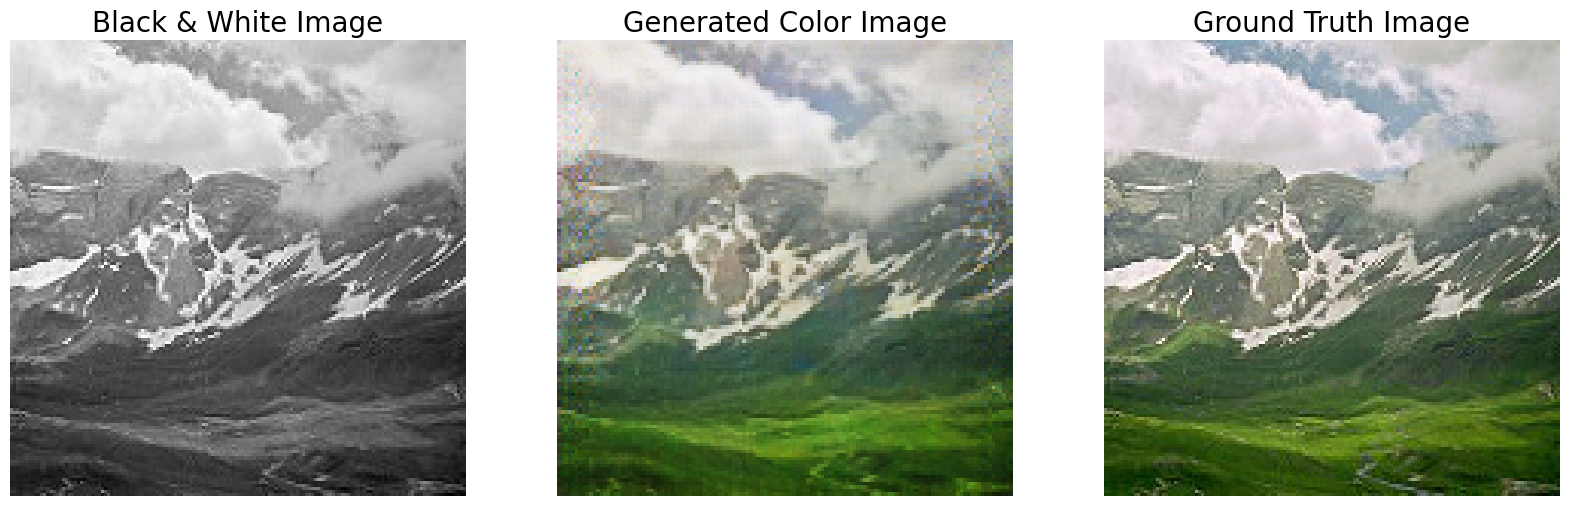

In [22]:
DATA_PATH = "/home/moez/Desktop/pix2pix_data/landscape_images/"
IMG_NAME = "3212" + ".jpg"
GRAY_PATH = DATA_PATH + "gray/" + IMG_NAME
COLOR_PATH = DATA_PATH + "color/" + IMG_NAME

img = cv2.cvtColor(cv2.imread(GRAY_PATH), cv2.COLOR_BGR2RGB)
img_array = img_to_array(Image.fromarray(cv2.resize(img,(128,128))))
transformed_img = (img_array/127.5) - 1
expanded_img = np.expand_dims(transformed_img, 0)
colorized_image = model(expanded_img)[0]

display(Image.open(GRAY_PATH), colorized_image, Image.open(COLOR_PATH))